# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

To check if the given data is normally distributed, there are many methods that we can use, but in this project we are going to use Shapiro-Wilk Test. In this test, our null hypothesis is that the data is normal distributed. We are going to compute $p$-value in this test, and if $p \leq 0.05$, then we reject the null hypothesis and if $p > 0.05$, then we fail to reject the null hypothesis.

In [75]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import datetime as dt
sns.set_style('darkgrid')
import time
import yfinance as yf

1) Test if there are periods of times when the log-returns of a stock/index have evidence of normal distribution.
    
2) Test if removing extremal return data creates a distribution with evidence of being normal.

In [76]:
tickers = ["AMZN"]

start_date = dt.datetime.today() - dt.timedelta(days = 2*(365))
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)
stock.head()

/tmp/ipython-input-76-2986784092.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2023-06-28,129.039993,131.479996,128.440002,128.940002,52149500
2023-06-29,127.900002,129.259995,127.260002,128.770004,40761000
2023-06-30,130.360001,131.250000,128.949997,129.470001,54310500
2023-07-03,130.220001,131.850006,130.070007,130.820007,28264800
2023-07-05,130.380005,131.399994,129.639999,130.240005,35895400


In [77]:
stock["Close"]["AMZN"]

,AMZN
Date,
2023-06-28,129.039993
2023-06-29,127.900002
2023-06-30,130.360001
2023-07-03,130.220001
2023-07-05,130.380005
...,...
2025-06-23,208.470001
2025-06-24,212.770004
2025-06-25,211.990005


1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.

In [78]:
stock["log_returns"] = np.log(stock["Close"]/stock["Close"].shift(1))

In [79]:
stock.dropna(inplace = True)

In [80]:
stock

Price,Close,High,Low,Open,Volume,log_returns
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2023-06-29,127.900002,129.259995,127.260002,128.770004,40761000,-0.008874
2023-06-30,130.360001,131.250000,128.949997,129.470001,54310500,0.019051
2023-07-03,130.220001,131.850006,130.070007,130.820007,28264800,-0.001075
2023-07-05,130.380005,131.399994,129.639999,130.240005,35895400,0.001228
2023-07-06,128.360001,128.729996,127.370003,128.250000,40639900,-0.015614
...,...,...,...,...,...,...
2025-06-23,208.470001,210.389999,207.309998,209.789993,37311700,-0.005835
2025-06-24,212.770004,214.339996,211.050003,212.139999,38378800,0.020417


Now, we start by plotting the graph of log_returns

In [81]:
windows = [15, 30, 45, 60, 100, 200]

AMZN log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


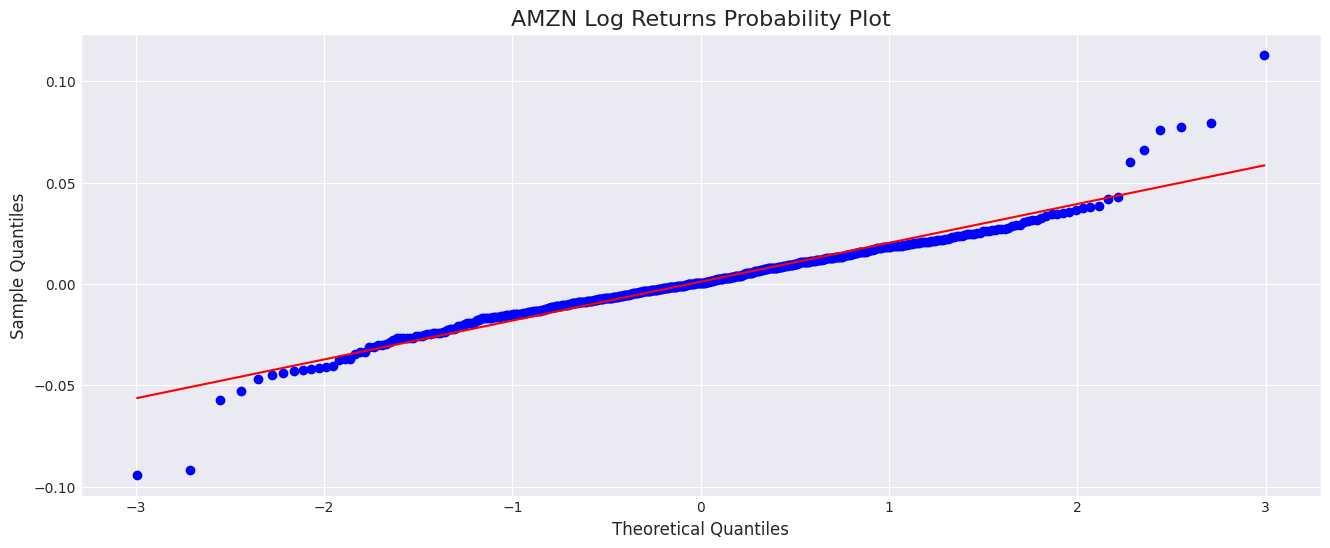

In [82]:
fig, ax = plt.subplots(figsize=(16, 6))
stats.probplot(stock["log_returns"], dist="norm", plot=ax)
ax.set_title("AMZN Log Returns Probability Plot", fontsize=16)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
ax.grid(True)

#Collect p-values of normality tests
p_amzn=stats.normaltest(stock["log_returns"])[1]

#Print evidence/non-evidence of normality
print(f"AMZN log return distribution: p-value = {p_amzn:.4f}")
if p_amzn < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")


We observed that the above log-normal returns has no evidence of normal distribution. Now we will see if there are times during which we can find some evidence of normal distribution. We will look at windows of time of $15, 30, 45, 60, 100, 200$ days.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


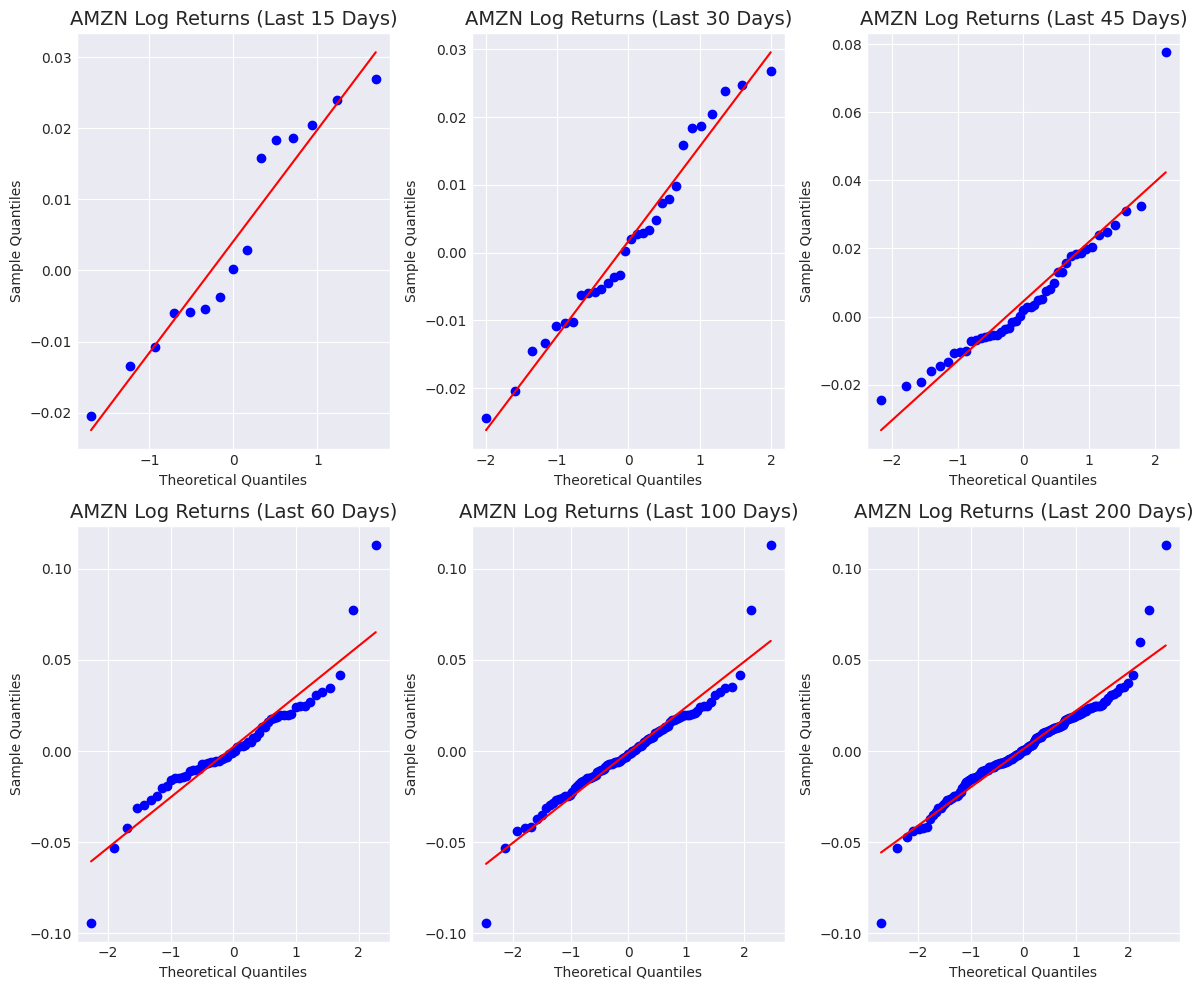

--- Normality Test Results ---
Window = 15 days:
  - p-value = 0.1940
  → No statistically significant evidence against normality.
Window = 30 days:
  - p-value = 0.6159
  → No statistically significant evidence against normality.
Window = 45 days:
  - p-value = 0.0000
  → Statistically significant evidence that the data is NOT normally distributed.
Window = 60 days:
  - p-value = 0.0004
  → Statistically significant evidence that the data is NOT normally distributed.
Window = 100 days:
  - p-value = 0.0000
  → Statistically significant evidence that the data is NOT normally distributed.
Window = 200 days:
  - p-value = 0.0000
  → Statistically significant evidence that the data is NOT normally distributed.


In [84]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

results_text = []

# Loop through each window size
for i, window in enumerate(windows):
    ax = axes[i]

    window_data = stock["log_returns"].tail(window).copy()

    # Plotting for the window
    stats.probplot(window_data, dist="norm", plot=ax)
    ax.set_title(f"AMZN Log Returns (Last {window} Days)", fontsize=14)
    ax.set_xlabel("Theoretical Quantiles", fontsize=10)
    ax.set_ylabel("Sample Quantiles", fontsize=10)
    ax.grid(True)

    if len(window_data) > 8:
        p_value = stats.normaltest(window_data)[1]

        results_text.append(f"Window = {window} days:")
        results_text.append(f"  - p-value = {p_value:.4f}")
        if p_value < 0.05:
            results_text.append("  → Statistically significant evidence that the data is NOT normally distributed.")
        else:
            results_text.append("  → No statistically significant evidence against normality.")
    else:
        results_text.append(f"Window = {window} days: Not enough data for normality test.")

plt.tight_layout()

plt.show()

print("--- Normality Test Results ---")
for line in results_text:
    print(line)



We can observe that in the short run there stock's log-normal returns behave and shows evidence of normal distribution but in the short run it does not show significant evidence of data being normally distributed.

3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.

In [22]:

tickers = ["XLI", "IDU", "XLP", "IYF"]

start_date = dt.datetime.today() - dt.timedelta(days = 5*(365))
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)
stock.head()

/tmp/ipython-input-22-1671842337.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end = end_date)
[*********************100%***********************]  4 of 4 completed


Price           Close                                        High             \
Ticker            IDU        IYF        XLI        XLP        IDU        IYF   
Date                                                                           
2020-06-29  61.396877  50.088745  63.250332  51.071575  61.396877  50.231749   
2020-06-30  61.665176  50.808380  63.611439  51.448841  61.898290  51.048262   
2020-07-01  63.033070  50.748425  63.324406  51.492699  63.270585  51.269701   
2020-07-02  63.143013  50.794552  63.870708  51.755917  63.741192  51.920143   
2020-07-06  62.426075  51.463444  64.787384  52.010353  63.736794  51.957042   

Price                                   Low                                   \
Ticker            XLI        XLP        IDU        IYF        XLI        XLP   
Date                                                                           
2020-06-29  63.250332  51.168086  60.050976  49.465981  61.750328  50.404777   
2020-06-30  63.972551  51.641863  61.036212  49.964187  62.583655  51.001385   
2020-07-01  64.759601  51.817327  61.581605  50.526995  63.268852  51.466379   
2020-07-02  64.815155  52.264788  62.989074  50.702292  63.713295  51.650630   
2020-07-06  65.129974  52.273566  61.937862  51.311215  64.315157  51.720824   

Price            Open                                   Volume          \
Ticker            IDU        IYF        XLI        XLP     IDU     IYF   
Date                                                                     
2020-06-29  60.574384  49.871930  62.148479  50.448645   67600  437800   
2020-06-30  61.278124  49.964187  62.768845  51.080348   59200  303600   
2020-07-01  61.581605  51.029822  64.241075  51.545342  339200  328800   
2020-07-02  63.591649  51.809427  64.342928  51.922615   68000  404200   
2020-07-06  63.336541  51.763294  64.861460  52.150732   57600  333000   

Price                           
Ticker           XLI       XLP  
Date                            
2020-06-29  10864700   9654200  
2020-06-30   8868500   7379800  
2020-07-01   9789000   7261600  
2020-07-02   8279800   6857200  
2020-07-06  10815400  10091300

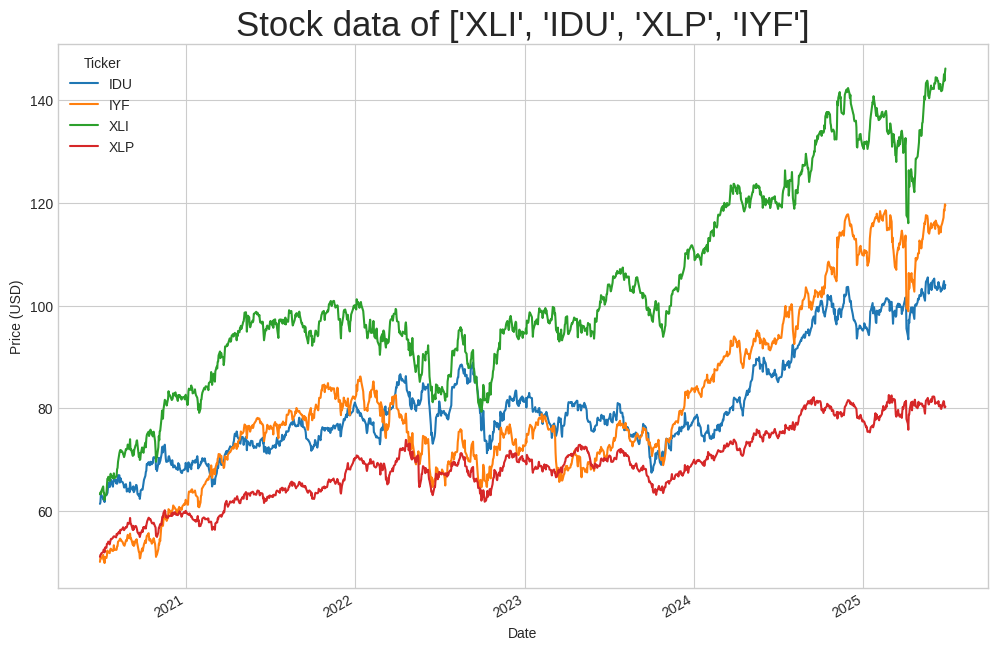

In [23]:
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock data of {tickers}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [24]:
# Calculate the log returns for the closing prices
log_returns = np.log(stock['Close'] / stock['Close'].shift(1))
log_returns.dropna(inplace = True)
# Display the first few rows of the log returns
print("Log Returns:")
print(log_returns.head())

Log Returns:
Ticker           IDU       IYF       XLI       XLP
Date                                              
2020-06-30  0.004360  0.014265  0.005693  0.007360
2020-07-01  0.021940 -0.001181 -0.004522  0.000852
2020-07-02  0.001743  0.000909  0.008590  0.005099
2020-07-06 -0.011419  0.013083  0.014250  0.004904
2020-07-07 -0.005015 -0.020283 -0.019337  0.009068


In [25]:
# Define the portfolio weights
weights = {
  'XLI': 0.3171,
  'IDU': 0.1000,
  'XLP': 0.1829,
  'IYF': 0.4000
}
# Get the columns in the right order from the log_returns dataframe
ordered_tickers = log_returns.columns.tolist()

In [26]:
ordered_weights = [weights[ticker] for ticker in ordered_tickers]

# Calculate the portfolio log return
portfolio_log_return = log_returns.dot(ordered_weights)

In [27]:
windows = [15, 30, 45, 60]

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


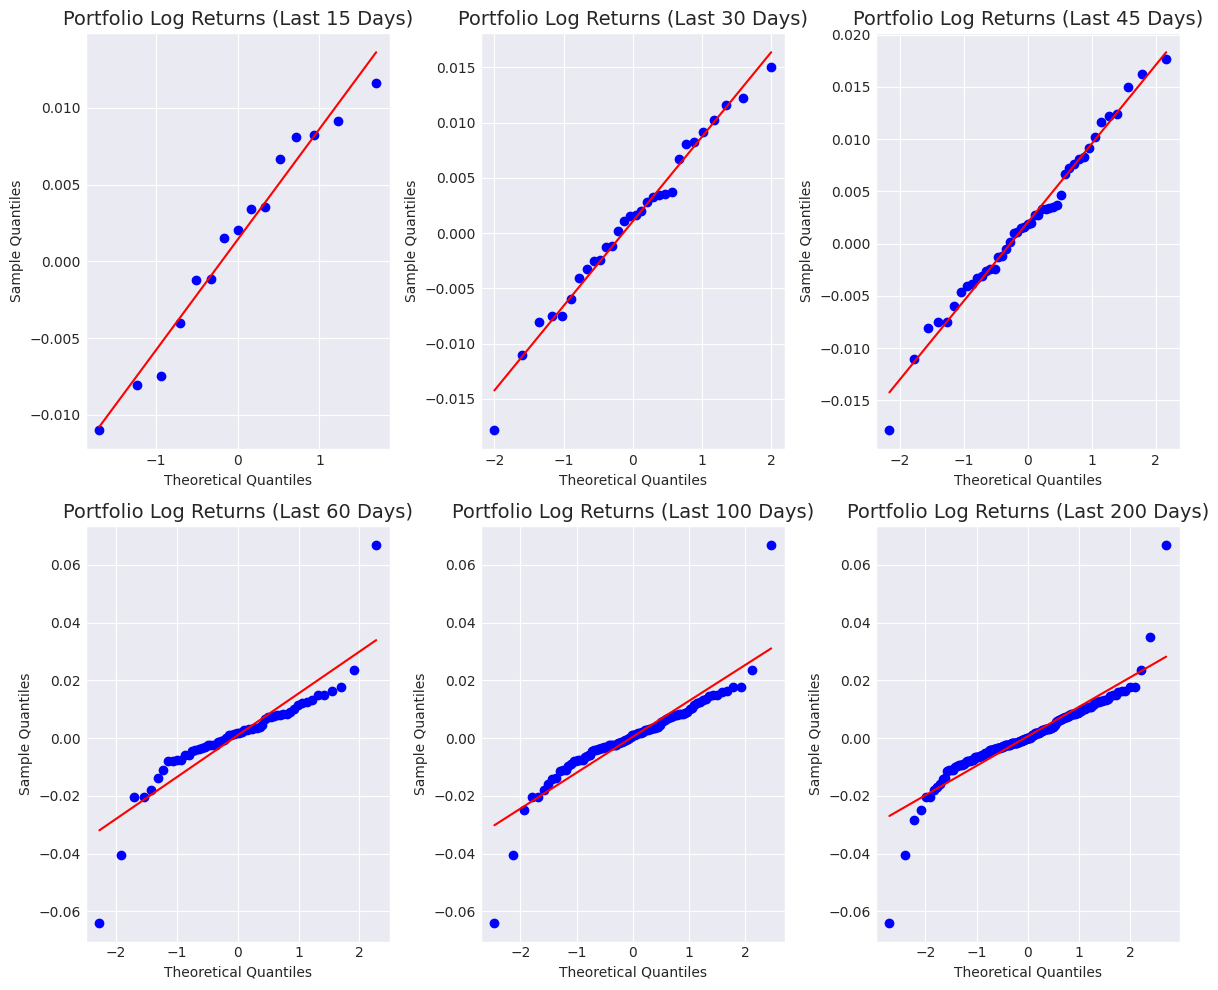

--- Normality Test Results ---
Window = 15 days:
  - p-value = 0.5934
  → No statistically significant evidence against normality.
Window = 30 days:
  - p-value = 0.6504
  → No statistically significant evidence against normality.
Window = 45 days:
  - p-value = 0.8090
  → No statistically significant evidence against normality.
Window = 60 days:
  - p-value = 0.0000
  → Statistically significant evidence that the data is NOT normally distributed.
Window = 100 days:
  - p-value = 0.0000
  → Statistically significant evidence that the data is NOT normally distributed.
Window = 200 days:
  - p-value = 0.0000
  → Statistically significant evidence that the data is NOT normally distributed.


In [85]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

results_text = []

# Loop through each window size
for i, window in enumerate(windows):
    ax = axes[i]

    window_data = portfolio_log_return.tail(window).copy()

    # Plotting for the window
    stats.probplot(window_data, dist="norm", plot=ax)
    ax.set_title(f"Portfolio Log Returns (Last {window} Days)", fontsize=14)
    ax.set_xlabel("Theoretical Quantiles", fontsize=10)
    ax.set_ylabel("Sample Quantiles", fontsize=10)
    ax.grid(True)

    if len(window_data) > 8:
        p_value = stats.normaltest(window_data)[1]

        results_text.append(f"Window = {window} days:")
        results_text.append(f"  - p-value = {p_value:.4f}")
        if p_value < 0.05:
            results_text.append("  → Statistically significant evidence that the data is NOT normally distributed.")
        else:
            results_text.append("  → No statistically significant evidence against normality.")
    else:
        results_text.append(f"Window = {window} days: Not enough data for normality test.")

plt.tight_layout()

plt.show()

print("--- Normality Test Results ---")
for line in results_text:
    print(line)



In the above graph, we can see that the log-normal returns of our portfolio shows the evidence of normal distribution for $15, 30$ and $45$ days but in the long time period of $100$ and $200$ days it shows no significant evidence of normal distribution.